# Titanic

    The sinking of the Titanic is one of the most infamous shipwrecks in history.
     The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912.

##### The training-set has 891 examples and 12 features + the target variable (survived).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,confusion_matrix,r2_score,mean_squared_error,classification_report
from sklearn.model_selection import cross_val_score


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data = data.set_index('PassengerId') #setting the index as passneger ID

In [5]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### Numerical Features: 
    Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)

#### Categorical Features: 
    Survived, Sex, Embarked, Pclass

#### Alphanumeric Features: 
    Ticket, Cabin

 - Ticket feature may not be possible to effectively help in predicting the survival possibility
 - removing the Ticket Feature

In [7]:
data = data.drop(columns = 'Ticket')

In [8]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

##### We observed that
- '714' rows Age data is available out of 891 rows  ('Missing 177')
- '204' rows cabin data is available out of 891 rows  ('Missing 687')
- '889' rows Embarked data is available out of 891 rows  ('Missing 2')

We see that Cabin column contains maximum null/missing values, it will be difficult to fill these null values, if we do then, it may not give us the correct/possible predictions as the null values will now be filled with imaginary calculated value

- Need to remove feature 'Cabin' 

In [9]:
data = data.drop(columns = 'Cabin')

In [10]:
data['Age'].median()

28.0

In [11]:
data['Embarked'].mode()[0]

'S'

In [12]:
data['Age'].fillna(data['Age'].median(),inplace=True)


In [13]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [14]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

- There are no more null values

In [15]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
data['Age'].min()

0.42

### Survived

In [17]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

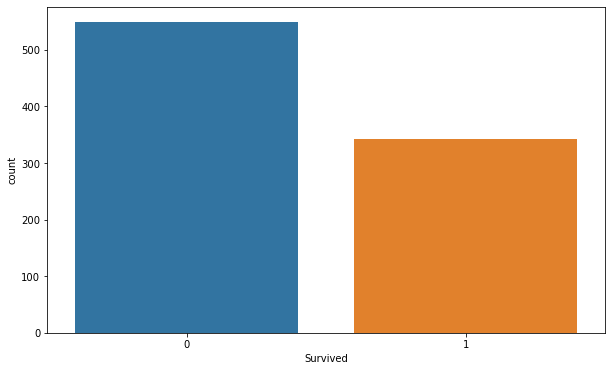

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='Survived', data= data)

### Sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

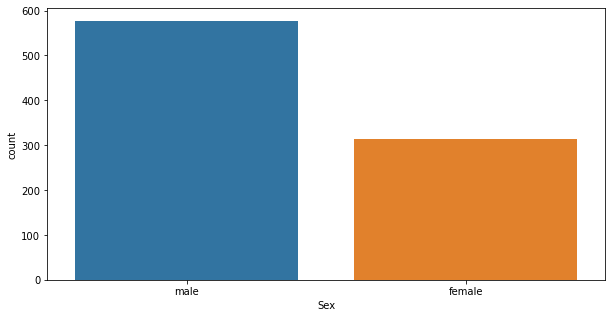

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sex', data= data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

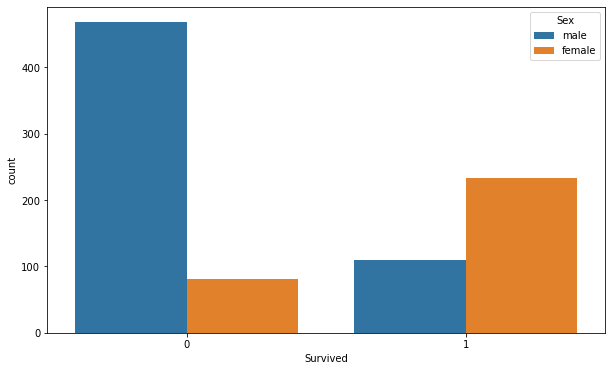

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x='Survived', hue='Sex', data= data)

### Pclass

There is no missing value on this feature and already a numerical value. so let's check it's impact on our train set.

In [21]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [22]:
print('Survival Rate in Pclass: \n\n',data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())


Survival Rate in Pclass: 

    Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


<AxesSubplot:xlabel='Survived', ylabel='count'>

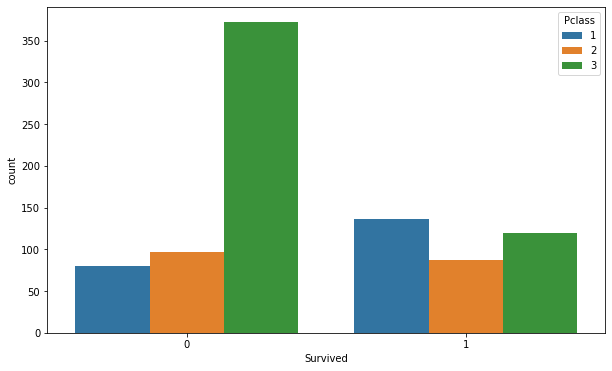

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x='Survived', hue='Pclass', data= data)

### SibSp

In [24]:
data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

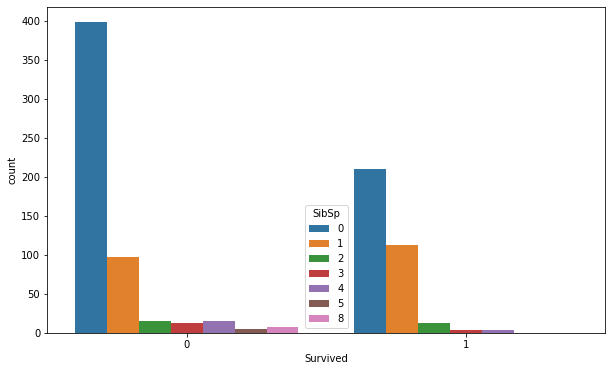

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x='Survived', hue='SibSp', data= data)

#### Name

In [26]:
# new data frame with split value columns
data["Name"]= data["Name"].str.split("t", n = 1, expand = True)

In [27]:
# new data frame with split value columns
new = data["Name"].str.split(" ", n = 1, expand = True)
  
# making separate first name column from new data frame
data["First_Name"]= new[1]
  
# making separate last name column from new data frame
data["Last_Name"]= new[0]
  
# Dropping old Name columns
data.drop(columns =["Name"], inplace = True)

In [28]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,First_Name,Last_Name
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Mr. Owen Harris,"Braund,"
2,1,1,female,38.0,1,0,71.2833,C,Mrs. John Bradley (Florence Briggs Thayer),"Cumings,"
3,1,3,female,26.0,0,0,7.9250,S,Miss. Laina,"Heikkinen,"
4,1,1,female,35.0,1,0,53.1000,S,None,Fu
5,0,3,male,35.0,0,0,8.0500,S,Mr. William Henry,"Allen,"
...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S,None,Mon
888,1,1,female,19.0,0,0,30.0000,S,Miss. Margare,"Graham,"
889,0,3,female,28.0,1,2,23.4500,S,None,Johns


In [29]:
data['Last_Name'].value_counts()

S              14
Andersson,      9
Pe              8
Sage,           7
Panula,         6
               ..
Faun            1
O'Dwyer,        1
Sadlier,        1
Landergren,     1
Sloper,         1
Name: Last_Name, Length: 638, dtype: int64

In [30]:
print('Survival Rate for Passengers with same Surname: \n\n',data[['Last_Name', 'Survived']].groupby(['Last_Name'], as_index=False).mean())

Survival Rate for Passengers with same Surname: 

       Last_Name  Survived
0             A  0.000000
1       Abbing,  0.000000
2          Abbo  0.500000
3      Abelson,  0.500000
4        Adahl,  0.000000
..          ...       ...
633     Zabour,  0.000000
634  Zimmerman,  0.000000
635          de  0.666667
636         del  0.000000
637         van  0.000000

[638 rows x 2 columns]


- WIll remove the Name data as this may not be effective in overall prediction

In [31]:
data = data.drop(columns = ['First_Name','Last_Name'])

In [32]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,28.0,1,2,23.4500,S


## Data Visualization

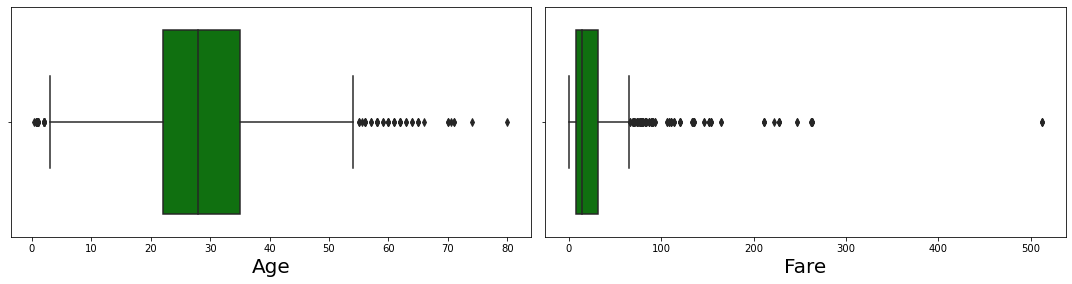

In [33]:
df = ['Age','Fare']

plt.figure(figsize = (15,23))
plotnumber=1

for i in df:
    if plotnumber<12:
        ax=plt.subplot(6,2,plotnumber)
        sns.boxplot(data[i],color = 'Green')
        plt.xlabel(i,fontsize=20)
    plotnumber +=1

plt.tight_layout()

In [34]:
DF = data.drop(columns = ['Survived','Pclass','Sex','SibSp', 'Parch','Embarked'])

IQR Method

In [35]:
Q1 = DF.quantile(0.25)
Q3 = DF.quantile(0.75)
IQR = Q3-Q1

data_new1 = DF[~((DF < (Q1-1.5*IQR)) | (DF> (Q3 + 1.5*Q3))).any(axis = 1)]

In [36]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",DF.shape)
print('Shape After'.ljust(20),":",data_new1.shape)
print('Percentage Loss'.ljust(20),":",(DF.shape[0]-data_new1.shape[0])/DF.shape[0])

Shape - Before and After:

Shape Before         : (891, 2)
Shape After          : (779, 2)
Percentage Loss      : 0.12570145903479238


In [37]:
#importing libraries

from scipy.stats import zscore

In [38]:
z=np.abs(zscore(DF))
threshold = 3
data_new2 = DF[(z<3).all(axis=1)]

In [39]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",DF.shape)
print('Shape After'.ljust(20),":",data_new2.shape)
print('Percentage Loss'.ljust(20),":",(DF.shape[0]-data_new2.shape[0])/DF.shape[0])

Shape - Before and After:

Shape Before         : (891, 2)
Shape After          : (864, 2)
Percentage Loss      : 0.030303030303030304


##### Loss of data is less by using zscore method when compared to IQR method
- Hence using zscore cleaned data for further analysis

In [40]:
data_new2

,Age,Fare
PassengerId,,
1,22.0,7.2500
2,38.0,71.2833
3,26.0,7.9250
4,35.0,53.1000
5,35.0,8.0500
...,...,...
887,27.0,13.0000
888,19.0,30.0000
889,28.0,23.4500


In [41]:
data = data.drop(columns = ['Age','Fare'])  #droping the original Age and Fare data in order to add the cleaned data

In [42]:
data

,Survived,Pclass,Sex,SibSp,Parch,Embarked
PassengerId,,,,,,
1,0,3,male,1,0,S
2,1,1,female,1,0,C
3,1,3,female,0,0,S
4,1,1,female,1,0,S
5,0,3,male,0,0,S
...,...,...,...,...,...,...
887,0,2,male,0,0,S
888,1,1,female,0,0,S
889,0,3,female,1,2,S


In [43]:
cleaned_data1 = data_new2['Age']

In [44]:
data = pd.concat([data, cleaned_data1], axis=1, join="inner")

In [45]:
cleaned_data2 = data_new2['Fare']

In [46]:
data = pd.concat([data, cleaned_data2], axis=1, join="inner")

In [47]:
data

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare
PassengerId,,,,,,,,
1,0,3,male,1,0,S,22.0,7.2500
2,1,1,female,1,0,C,38.0,71.2833
3,1,3,female,0,0,S,26.0,7.9250
4,1,1,female,1,0,S,35.0,53.1000
5,0,3,male,0,0,S,35.0,8.0500
...,...,...,...,...,...,...,...,...
887,0,2,male,0,0,S,27.0,13.0000
888,1,1,female,0,0,S,19.0,30.0000
889,0,3,female,1,2,S,28.0,23.4500


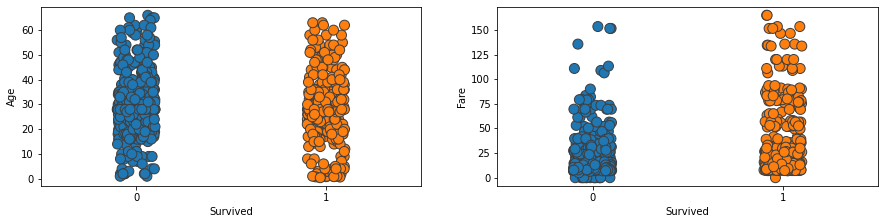

In [48]:
y_vars = ['Age','Fare']

plt.figure(figsize = (15,23))
plotnumber=1

for y in y_vars:
    if plotnumber<12:
        ax=plt.subplot(6,2,plotnumber)
        sns.stripplot(data=data,x='Survived',y=y, size=10, linewidth=1)
    plotnumber +=1    

#### SibSp  and   Parch

With the number of siblings/spouse and the number of children/parents we can create new feature called "Family_members".

In [49]:
data['Family_members'] = data.SibSp + data.Parch + 1

In [50]:
print (data[['Family_members', 'Survived']].groupby(['Family_members'], as_index=False).mean())

   Family_members  Survived
0               1  0.299618
1               2  0.541935
2               3  0.590000
3               4  0.724138
4               5  0.076923
5               6  0.055556
6               7  0.333333
7               8  0.000000
8              11  0.000000


It seems has a good effect on our prediction

#### Embarked

In [51]:
from sklearn.preprocessing import LabelEncoder
l_enc = LabelEncoder()

In [52]:
data['Embarked'] = l_enc.fit_transform(data['Embarked'])
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare,Family_members
PassengerId,,,,,,,,,
1,0,3,male,1,0,2,22.0,7.2500,2
2,1,1,female,1,0,0,38.0,71.2833,2
3,1,3,female,0,0,2,26.0,7.9250,1
4,1,1,female,1,0,2,35.0,53.1000,2
5,0,3,male,0,0,2,35.0,8.0500,1


## Correlation between features v/s features

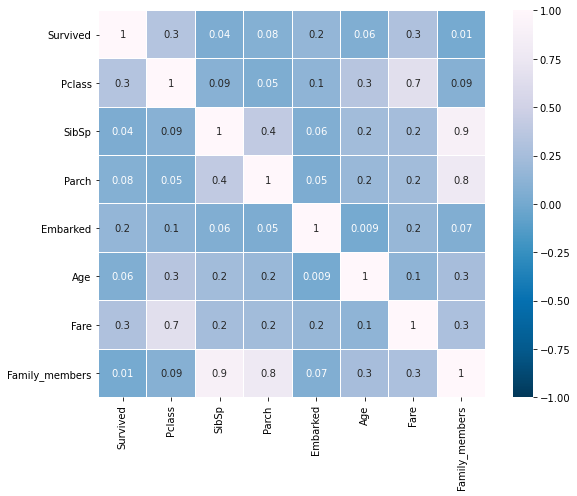

In [53]:
data_corr = data.corr().abs() #to get the correlation values

plt.figure(figsize=(9,7))
sns.heatmap(data_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.1g',linewidth=0.02,cmap = 'PuBu_r')

plt.tight_layout()

- Features 'Embarked' and 'Age' are least correlated with each other with valu '0.009'
- Features 'Family_members' are highly correlated with 'SibSp' value '0.9' and with 'Parch' value '0.8'
- we see that correlation between features are not more than 0.9

###### Applying Encoding to Categorical Data

In [54]:
pip install category_encoders

In [55]:
import category_encoders as ce

ohe = ce.OneHotEncoder(cols = ['Sex'],use_cat_names=True)
Titanic = ohe.fit_transform(data)

In [56]:
Titanic

,Survived,Pclass,Sex_male,Sex_female,SibSp,Parch,Embarked,Age,Fare,Family_members
PassengerId,,,,,,,,,,
1,0,3,1,0,1,0,2,22.0,7.2500,2
2,1,1,0,1,1,0,0,38.0,71.2833,2
3,1,3,0,1,0,0,2,26.0,7.9250,1
4,1,1,0,1,1,0,2,35.0,53.1000,2
5,0,3,1,0,0,0,2,35.0,8.0500,1
...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,0,0,0,2,27.0,13.0000,1
888,1,1,0,1,0,0,2,19.0,30.0000,1
889,0,3,0,1,1,2,2,28.0,23.4500,4


# Splitting Features and Label

In [120]:
X = Titanic.drop(columns = 'Survived')
Y= Titanic['Survived']

AttributeError: 'str' object has no attribute 'drop'

### Scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled

# Splitting train and test data

In [ ]:
#importing libraries
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.18, random_state=11) #not applying scaled data
y_train.sample(5)

# MODEL BUILDING:

#### Model1 : LogisticRegression

In [121]:
from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression()
Log_Reg.fit(x_train,y_train)
y_pred_log = Log_Reg.predict(x_test)

Accuracy Score:

In [122]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred_log))
print('Mean_Squared_Error: ',mean_squared_error(y_test,y_pred_log))
print('R2_Score: ',r2_score(y_test,y_pred_log))

Accuracy Score:  0.8205128205128205
Mean_Squared_Error:  0.1794871794871795
R2_Score:  0.2416666666666667


Cross Validation:

In [123]:
print("Cross Validation Score: ", cross_val_score(Log_Reg,X,Y,cv=3))
print('Avg_Cross_Validation Score: ',cross_val_score(Log_Reg,X,Y,cv=3).mean())

Cross Validation Score:  [0.79166667 0.79513889 0.79513889]
Avg_Cross_Validation Score:  0.7939814814814814


Confusion Matrix

In [124]:
confusion_matrix(y_test,y_pred_log)

array([[85, 11],
       [17, 43]], dtype=int64)

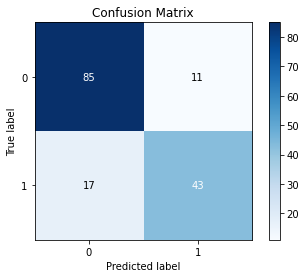

In [125]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred_log)
plt.show()

In [126]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        96
           1       0.80      0.72      0.75        60

    accuracy                           0.82       156
   macro avg       0.81      0.80      0.81       156
weighted avg       0.82      0.82      0.82       156



#### Model2: DecisionTreeClassifier

In [127]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_dtc= dtc.predict(x_test)

Accuracy Score:

In [128]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred_dtc))
print('Mean_Squared_Error: ',mean_squared_error(y_test,y_pred_dtc))
print('R2_Score: ',r2_score(y_test,y_pred_dtc))

Accuracy Score:  0.7948717948717948
Mean_Squared_Error:  0.20512820512820512
R2_Score:  0.13333333333333341


Cross Validation:

In [129]:
print("Cross Validation Score: ", cross_val_score(dtc,X,Y,cv=3))
print('Avg_Cross_Validation Score: ',cross_val_score(dtc,X,Y,cv=3).mean())

Cross Validation Score:  [0.73958333 0.78125    0.77777778]
Avg_Cross_Validation Score:  0.7754629629629629


Confusion Matrix

In [130]:
confusion_matrix(y_test,y_pred_dtc)

array([[81, 15],
       [17, 43]], dtype=int64)

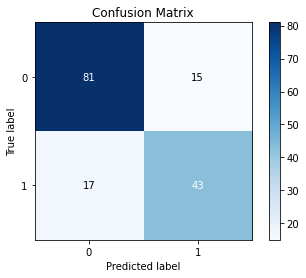

In [131]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred_dtc)
plt.show()

Classification Report

In [132]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84        96
           1       0.74      0.72      0.73        60

    accuracy                           0.79       156
   macro avg       0.78      0.78      0.78       156
weighted avg       0.79      0.79      0.79       156



#### Model3 : RandomForestClassifier

In [133]:
from sklearn.ensemble import RandomForestClassifier

Rand_C = RandomForestClassifier()
Rand_C.fit(x_train,y_train)
y_pred_Rand_C = Rand_C.predict(x_test)

Accuracy Score:

In [134]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred_Rand_C))
print('Mean_Squared_Error: ',mean_squared_error(y_test,y_pred_Rand_C))
print('R2_Score: ',r2_score(y_test,y_pred_Rand_C))

Accuracy Score:  0.8012820512820513
Mean_Squared_Error:  0.1987179487179487
R2_Score:  0.16041666666666676


Cross Validation:

In [135]:
print("Cross Validation Score: ", cross_val_score(Rand_C,X,Y,cv=3))
print('Avg_Cross_Validation Score: ',cross_val_score(Rand_C,X,Y,cv=3).mean())

Cross Validation Score:  [0.78472222 0.81597222 0.8125    ]
Avg_Cross_Validation Score:  0.7974537037037037


Confusion Matrix

In [136]:
confusion_matrix(y_test,y_pred_Rand_C)

array([[82, 14],
       [17, 43]], dtype=int64)

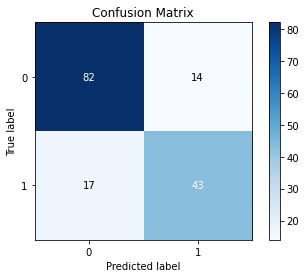

In [137]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred_Rand_C)
plt.show()

Classification Report

In [138]:
print(classification_report(y_test,y_pred_Rand_C))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        96
           1       0.75      0.72      0.74        60

    accuracy                           0.80       156
   macro avg       0.79      0.79      0.79       156
weighted avg       0.80      0.80      0.80       156



#### Model4: KnnClassifier

In [139]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)

Accuracy Score:

In [140]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred_knn))
print('Mean_Squared_Error: ',mean_squared_error(y_test,y_pred_knn))
print('R2_Score: ',r2_score(y_test,y_pred_log))

Accuracy Score:  0.7692307692307693
Mean_Squared_Error:  0.23076923076923078
R2_Score:  0.2416666666666667


Cross Validation:

In [141]:
print("Cross Validation Score: ", cross_val_score(knn,X,Y,cv=3))
print('Avg_Cross_Validation Score: ',cross_val_score(knn,X,Y,cv=3).mean())

Cross Validation Score:  [0.69444444 0.75694444 0.75      ]
Avg_Cross_Validation Score:  0.7337962962962963


Confusion Matrix

In [142]:
confusion_matrix(y_test,y_pred_knn)

array([[83, 13],
       [23, 37]], dtype=int64)

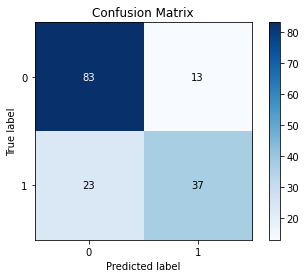

In [143]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred_knn)
plt.show()

Classification Report

In [144]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        96
           1       0.74      0.62      0.67        60

    accuracy                           0.77       156
   macro avg       0.76      0.74      0.75       156
weighted avg       0.77      0.77      0.76       156



#### Model5 : SVC

In [145]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(x_train,y_train)
y_pred_sv = sv.predict(x_test)

Accuracy Score:

In [146]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred_sv))
print('Mean_Squared_Error: ',mean_squared_error(y_test,y_pred_sv))
print('R2_Score: ',r2_score(y_test,y_pred_log))

Accuracy Score:  0.7948717948717948
Mean_Squared_Error:  0.20512820512820512
R2_Score:  0.2416666666666667


Cross Validation:

In [147]:
print("Cross Validation Score: ", cross_val_score(sv,X,Y,cv=3))
print('Avg_Cross_Validation Score: ',cross_val_score(sv,X,Y,cv=3).mean())

Cross Validation Score:  [0.625      0.71180556 0.68055556]
Avg_Cross_Validation Score:  0.6724537037037037


Confusion Matrix

In [148]:
confusion_matrix(y_test,y_pred_sv)

array([[86, 10],
       [22, 38]], dtype=int64)

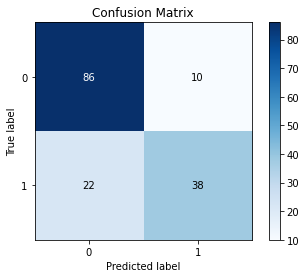

In [149]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred_sv)
plt.show()

Classification Report

In [150]:
print(classification_report(y_test,y_pred_sv))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84        96
           1       0.79      0.63      0.70        60

    accuracy                           0.79       156
   macro avg       0.79      0.76      0.77       156
weighted avg       0.79      0.79      0.79       156



#### Model6: Naive Bayes classifier(GaussianNB)

In [151]:
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test)

Accuracy Score:

In [152]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred_gnb))
print('Mean_Squared_Error: ',mean_squared_error(y_test,y_pred_gnb))
print('R2_Score: ',r2_score(y_test,y_pred_gnb))

Accuracy Score:  0.7948717948717948
Mean_Squared_Error:  0.20512820512820512
R2_Score:  0.13333333333333341


Cross Validation:

In [153]:
print("Cross Validation Score: ", cross_val_score(gnb,X,Y,cv=3))
print('Avg_Cross_Validation Score: ',cross_val_score(gnb,X,Y,cv=3).mean())

Cross Validation Score:  [0.75347222 0.80208333 0.79166667]
Avg_Cross_Validation Score:  0.7824074074074074


Confusion Matrix

In [154]:
confusion_matrix(y_test,y_pred_gnb)

array([[81, 15],
       [17, 43]], dtype=int64)

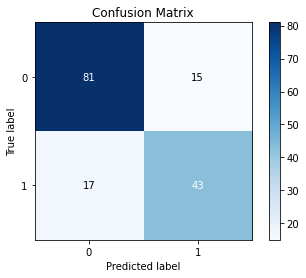

In [155]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred_gnb)
plt.show()

Classification Report

In [156]:
print(classification_report(y_test,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84        96
           1       0.74      0.72      0.73        60

    accuracy                           0.79       156
   macro avg       0.78      0.78      0.78       156
weighted avg       0.79      0.79      0.79       156



##### Comparing Models

In [157]:
#Accuracy Score
A1 = accuracy_score(y_test,y_pred_log)
A2 = accuracy_score(y_test,y_pred_dtc)
A3 = accuracy_score(y_test,y_pred_Rand_C)
A4 = accuracy_score(y_test,y_pred_knn)
A5 = accuracy_score(y_test,y_pred_sv)
A6 = accuracy_score(y_test,y_pred_gnb)

#Cross Validation Scores
C1 = cross_val_score(Log_Reg,X,Y,cv=3).mean()
C2 = cross_val_score(dtc,X,Y,cv=3).mean()
C3 = cross_val_score(Rand_C,X,Y,cv=3).mean()
C4 = cross_val_score(knn,X,Y,cv=3).mean()
C5 = cross_val_score(sv,X,Y,cv=3).mean()
C6 = cross_val_score(gnb,X,Y,cv=3).mean()

In [158]:
Overall_Score = pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Random Forest Classifier','KnnClassifier','SVC','GNB'],'Accuracy_Score':[A1,A2,A3,A4,A5,A6],'Cross_Validation_Score':[C1,C2,C3,C4,C5,C6]})
Overall_Score['Difference'] = Overall_Score['Accuracy_Score'] - Overall_Score['Cross_Validation_Score']

In [159]:
Overall_Score

,Model,Accuracy_Score,Cross_Validation_Score,Difference
0,Logistic Regression,0.820513,0.793981,0.026531
1,Decision Tree,0.794872,0.768519,0.026353
2,Random Forest Classifier,0.801282,0.799769,0.001514
3,KnnClassifier,0.769231,0.733796,0.035434
4,SVC,0.794872,0.672454,0.122418
5,GNB,0.794872,0.782407,0.012464


In [160]:
Overall_Score['Difference'].min()

0.0015135327635328322

In [161]:
Overall_Score[Overall_Score['Difference'] == 0.0015135327635328322]

,Model,Accuracy_Score,Cross_Validation_Score,Difference
2,Random Forest Classifier,0.801282,0.799769,0.001514


# "Random Forest Classifier" is our best model

Let's use Hyper Parameter Tuning to increase the accuracy

In [183]:
param_grid = {'n_estimators': range(2,50,4),
                 'max_features': ["sqrt"],
                 'max_depth': range(2,30,2),
                    'min_samples_split':range(1,3)}

In [184]:
from sklearn.model_selection import GridSearchCV
gridsearch=GridSearchCV(estimator=Rand_C,param_grid=param_grid)

In [ ]:
gridsearch.fit(x_train,y_train)
print(gridsearch.best_score_, gridsearch.best_params_)

In [ ]:
Rand_C_gridsearch = RandomForestClassifier(max_depth= 6, max_features='sqrt', min_samples_split= 2, n_estimators= 48)
Rand_C_gridsearch.fit(x_train,y_train)
y_pred_Rand_C_gridsearch = Rand_C_gridsearch.predict(x_test)

##### Accuracy Score after tuning:

In [182]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred_Rand_C_gridsearch))
print('Mean_Squared_Error: ',mean_squared_error(y_test,y_pred_Rand_C_gridsearch))
print('R2_Score: ',r2_score(y_test,y_pred_Rand_C_gridsearch))

Accuracy Score:  0.7948717948717948
Mean_Squared_Error:  0.20512820512820512
R2_Score:  0.13333333333333341


##### Cross Validation Score after tuning:

In [167]:
print("Cross Validation Score: ", cross_val_score(gnb,X,Y,cv=3))
print('Avg_Cross_Validation Score: ',cross_val_score(gnb,X,Y,cv=3).mean())

Cross Validation Score:  [0.75347222 0.80208333 0.79166667]
Avg_Cross_Validation Score:  0.7824074074074074


##### confusion matrix after tuning

In [168]:
confusion_matrix(y_test,y_pred_Rand_C_gridsearch)

array([[87,  9],
       [21, 39]], dtype=int64)

##### Classification Report after tuning

In [169]:
print(classification_report(y_test,y_pred_Rand_C_gridsearch))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85        96
           1       0.81      0.65      0.72        60

    accuracy                           0.81       156
   macro avg       0.81      0.78      0.79       156
weighted avg       0.81      0.81      0.80       156



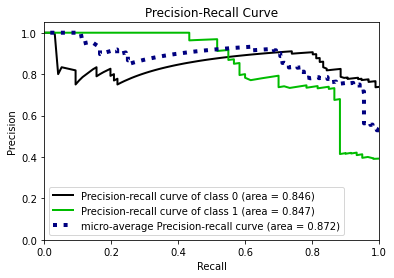

In [170]:
import matplotlib.pyplot as plt
import scikitplot as skplt

# This is a RandomForest classifier after tuning. We'll generate probabilities on the test set.
Rand_C_gridsearch.fit(x_train, y_train)
probas1 = Rand_C_gridsearch.predict_proba(x_test)
# Now plot.
skplt.metrics.plot_precision_recall_curve(y_test, probas1)

plt.show()

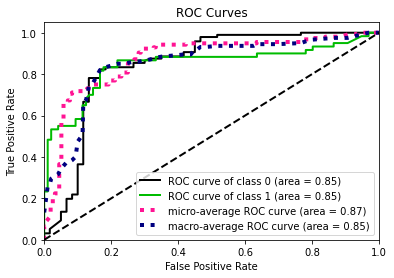

In [171]:
import matplotlib.pyplot as plt
import scikitplot as skplt

# This is a RandomForest classifier. We'll generate probabilities on the test set.
Rand_C_gridsearch.fit(x_train, y_train)
probas1 = Rand_C_gridsearch.predict_proba(x_test)
# Now plot.
skplt.metrics.plot_roc(y_test, probas1)

plt.show()

In [172]:
from sklearn.model_selection import cross_val_predict


predictions = cross_val_predict(Rand_C_gridsearch, x_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[391,  50],
       [ 80, 187]], dtype=int64)

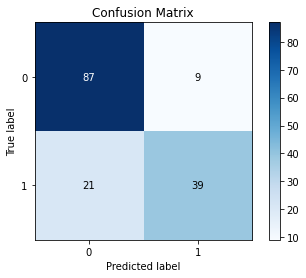

In [173]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test,y_pred_Rand_C_gridsearch)
plt.show()

## Evaluated: 
    - The first row is about the not-survived-predictions: 87 passengers were correctly classified as not survived (called true negatives) and 9 where wrongly classified as survived (false positives).

    - The second row is about the survived-predictions: 18 passengers were wrongly classified as not survived (false negatives) and 42 where correctly classified as survived (true positives).



A confusion matrix gives you a lot of information about how well your model does, but theres a way to get even more, like computing the classifiers precision.

In [174]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.7890295358649789
Recall: 0.700374531835206


Our model predicts 81% of the time, a passengers survival correctly (precision). The recall tells us that it predicted the survival of 73 % of the people who actually survived.

In [175]:
from sklearn.metrics import f1_score
print('F1_Score: ',f1_score(y_train, predictions))

F1_Score:  0.7420634920634921


## Saving the model for future prediction:

In [176]:
import pickle

In [177]:
Titanic='Titanic_Survival_Prediction__model.pickle'
pickle.dump(Rand_C_gridsearch,open(Titanic,'wb'))

______________________